In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [28]:
# Importing packages for data preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Importing Packages for EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import packages for model building
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Masking,Dropout 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sub = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# Checking the shape of training data
train.shape

(7613, 5)

In [8]:
# Checking the shape of testing data
test.shape

(3263, 4)

In [9]:
def clean_text(text):
    
    # Expanding chatwords and contracts clearing contractions
    mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

    text=' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) # Apply mapping to the tweets
    text =BeautifulSoup(text).get_text()  #Remove HTML tags
    text = re.sub('[\w\.-]+@[\w\.-]+\.\w+',' ',text) # remove emails
    emoji_clean =re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # arrows, shapes, and flags, as well as pictographs such as food, weather, and sports symbols.
                           "]+", flags=re.UNICODE)
     
    text = re.sub(r"mh370", "missing malaysia airlines flight", text) #the next rows are used to expand common achronims
    text = re.sub(r"okwx", "oklahoma city weather", text)
    text = re.sub(r"arwx", "arkansas weather", text)    
    text = re.sub(r"gawx", "georgia weather", text)  
    text = re.sub(r"scwx", "south carolina weather", text)  
    text = re.sub(r"cawx", "california weather", text)
    text = re.sub(r"tnwx", "tennessee weather", text)
    text = re.sub(r"azwx", "arizona weather", text)  
    text = re.sub(r"alwx", "alabama Weather", text)
    text = re.sub(r"wordpressdotcom", "wordpress", text)    
    text = re.sub(r"usnwsgov", "united states national weather service", text)
    text = re.sub(r"suruc", "sanliurfa", text)

    text = re.sub(r'https?://(www\.)?(\w+)(\.\w+)(/\w*)?', '', text)     # Remove urls

    text = re.sub('\w*\d\w*', '', text)     # Remove words with numbers
    text = re.sub(r"@\w+",'',text)   #removing mentions
    text = "".join([word.lower() for word in text if word not in string.punctuation]) # Remove punctuation
    stop_words = set(stopwords.words('english'))
    
    text =re.sub(' +',' ',text).strip() # Remove extra spaces
    
    # Remove Stopwords
    text =' '.join([word for word in text.split() if word.isalpha() and word not in stop_words]) 
    
    # Correcting spelling
    text =' '.join([str(TextBlob(word).correct()) for word in text.split()])
    
    # lemmatizing
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in text.split()]
    text = ' '.join(words)

    return text

In [10]:
train_text = train['text']
train_label=train['target']
test_text = test['text']

In [11]:
print(train_text)

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object


In [12]:
print(test_text)

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object


In [13]:
# Cleaning Training and Testing Data
X_train = train_text.apply(clean_text)
X_test = test_text.apply(clean_text)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [14]:
#After Data Cleaning
print(X_train)
print(X_test)

0              deed reason earthquake may allah forgive u
1                    forest fire near la range ask canada
2       resident asked shelter place notified officer ...
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire hour...
                              ...                        
7608    two giant crank holding bridge collapse nearby...
7609    control wild fire california even northern par...
7610                                   etc volcano hawaii
7611    police investigation bike collided car little ...
7612    latest home razed northern california wildlife...
Name: text, Length: 7613, dtype: object
0                             happened terrible car crash
1       heard earthquake different city stay safe ever...
2       forest fire spot pond goose fleeing across str...
3                    apocalypse lighting spokane wildfire
4                      typhoid soudelor kill china taiwan
                              ..

EDA

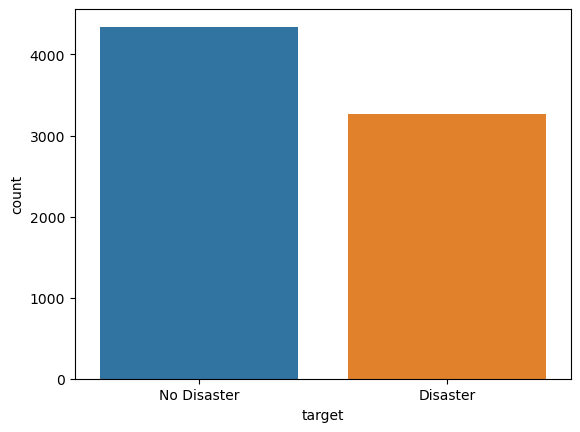

In [15]:
# Checking the Disaster and Non Disaster Count
plt.figure()
sns.countplot(x=train_label)
plt.xticks(ticks=[0,1],labels=["No Disaster","Disaster"])
plt.show()

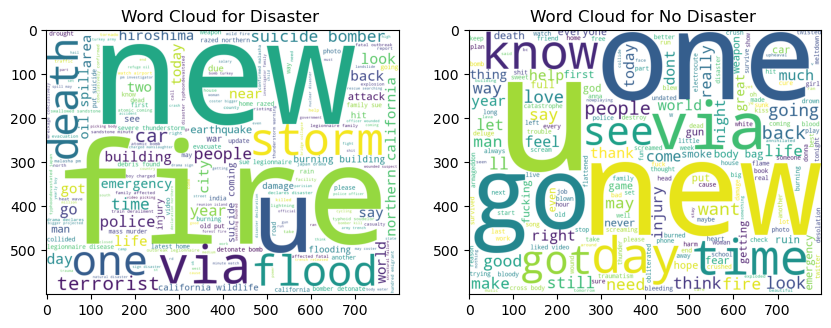

In [16]:
# Word clouds for true and false disasters
positive_data=X_train[train_label==1]
positive_data_string = ' '.join(positive_data)
wcp = WordCloud(max_words = 200, width=800,height=600,background_color='white').generate(positive_data_string)

negative_data = X_train[train_label==0]
negative_data_string = ' '.join(negative_data)
wcn = WordCloud(max_words=200, width =800, height=600,background_color= 'white').generate(negative_data_string)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(wcp)
plt.title("Word Cloud for Disaster ")

plt.subplot(1,2,2)
plt.imshow(wcn)
plt.title("Word Cloud for No Disaster ")
plt.show()

## Model Building

Tokenizing

In [17]:
tokenizer = Tokenizer(oov_token="<OOV>")
corpus = X_train
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
print(total_words)

10118


In [18]:
max_len = max(len(x.split()) for x in X_train)
max_len


23

In [19]:
s_train = tokenizer.texts_to_sequences(X_train)
s_test = tokenizer.texts_to_sequences(X_test)
X_train_p = np.array(pad_sequences(s_train, maxlen= max_len,padding='post'))
X_test_p = np.array(pad_sequences(s_test, maxlen= max_len,padding='post'))

In [20]:
X_train_p

array([[3788,  417,  167, ...,    0,    0,    0],
       [ 111,    2,  145, ...,    0,    0,    0],
       [1572, 1259, 1905, ...,    0,    0,    0],
       ...,
       [ 531,  476, 1441, ...,    0,    0,    0],
       [  21,  741, 2052, ...,    0,    0,    0],
       [ 136,   20,  482, ...,    0,    0,    0]], dtype=int32)

In [21]:
X_test_p

array([[ 799, 1731,   45, ...,    0,    0,    0],
       [ 367,  167, 1087, ...,    0,    0,    0],
       [ 111,    2,  458, ...,    0,    0,    0],
       ...,
       [ 769,  492,  294, ...,    0,    0,    0],
       [2326,  300,  410, ...,    0,    0,    0],
       [   1, 1304, 1442, ...,    0,    0,    0]], dtype=int32)

In [22]:
# Checking balance
y_train =train_label
y_train.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Dataset is imbalanced, therefore balancing by Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampler = RandomOverSampler(random_state = 42)
X_train_res,y_train_res = RandomOverSampler.fit_resample(X_train_p,y_train)
print(X_train_res.shape)

(8684, 23)


In [24]:
y_train_res.value_counts()

1    4342
0    4342
Name: target, dtype: int64

In [25]:
X_train_res

array([[3788,  417,  167, ...,    0,    0,    0],
       [ 111,    2,  145, ...,    0,    0,    0],
       [1572, 1259, 1905, ...,    0,    0,    0],
       ...,
       [ 372,  212,  157, ...,    0,    0,    0],
       [ 382, 7208,    0, ...,    0,    0,    0],
       [  24, 6513, 1485, ...,    0,    0,    0]], dtype=int32)

# Model Building

In [26]:
tw=len(tokenizer.word_index)# No of words
input_length = X_train_res.shape[1] # Input length

Model Building

In [29]:
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(input_length,)))
model.add(Embedding(tw+1,10,input_length = input_length,mask_zero=True, embeddings_initializer='zeros'))
model.add(Bidirectional(LSTM(10)))
model.add(Dropout(0.2)) 
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 23)                0         
                                                                 
 embedding_1 (Embedding)     (None, 23, 10)            101180    
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               1680      
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 102,881
Trainable params: 102,881
Non-trainable params: 0
________________________________________________

In [30]:
adam = Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy',optimizer=adam,metrics=['accuracy'])
history=model.fit(X_train_res,y_train_res,epochs=100,verbose=1,validation_split=0.1)
print(model)

Epoch 1/100
245/245 [==============================] - 13s 26ms/step - loss: 0.6910 - accuracy: 0.5550 - val_loss: 0.7170 - val_accuracy: 0.0000e+00
Epoch 2/100
245/245 [==============================] - 4s 17ms/step - loss: 0.6781 - accuracy: 0.5829 - val_loss: 0.7257 - val_accuracy: 0.2152
Epoch 3/100
245/245 [==============================] - 4s 17ms/step - loss: 0.6126 - accuracy: 0.7477 - val_loss: 0.6710 - val_accuracy: 0.6249
Epoch 4/100
245/245 [==============================] - 4s 17ms/step - loss: 0.4926 - accuracy: 0.8429 - val_loss: 0.5272 - val_accuracy: 0.7837
Epoch 5/100
245/245 [==============================] - 4s 17ms/step - loss: 0.4099 - accuracy: 0.8655 - val_loss: 0.4365 - val_accuracy: 0.8113
Epoch 6/100
245/245 [==============================] - 4s 17ms/step - loss: 0.3568 - accuracy: 0.8804 - val_loss: 0.3922 - val_accuracy: 0.8331
Epoch 7/100
245/245 [==============================] - 4s 17ms/step - loss: 0.3184 - accuracy: 0.8926 - val_loss: 0.3473 - val_accu

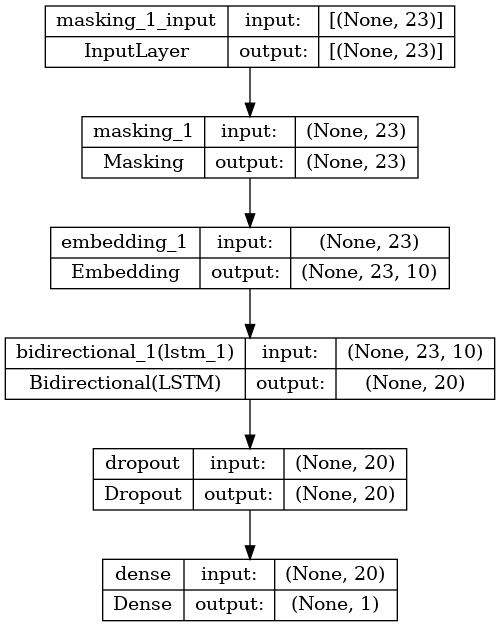

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True)

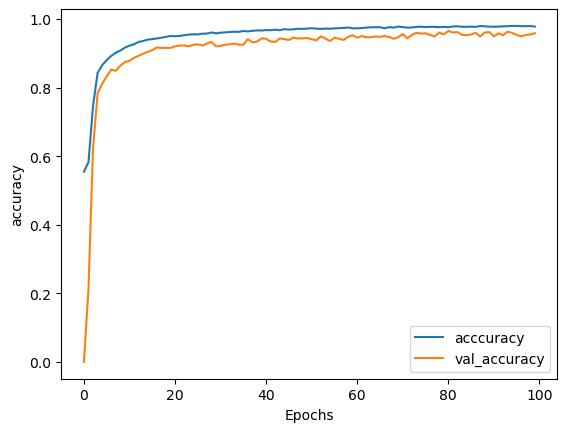

In [32]:
plt.plot(history.history['accuracy'],label='acccuracy')
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [34]:
prediction = model.predict(X_test_p)

102/102 [==============================] - 3s 4ms/step


In [35]:
sub["target"] = prediction
sub.head()

,id,target
0,0,0.986742
1,2,0.071922
2,3,0.999675
3,9,0.986915
4,11,0.999429


In [36]:
sub["target"] =sub["target"].apply(lambda x : 0 if x<=.5 else 1)
sub

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [37]:
sub.to_csv("submission.csv", index=False)